## Data Cleaning

In [ ]:
import re
import pandas as pd
all_songs =  pd.read_csv("all_songs_after2001.csv",index_col=0)

# filter out some faulty lyrics due to matching
df = all_songs[all_songs['lyrics'].str.contains('Intro|Chorus|Verse')]
df = df[df['lyrics'].str.contains('Last updated|feat|Version')==False]
df = df[df['song title'].str.contains('Unreleased|Remaster|Version|Live|Rapper|Demo|Mixed')==False]

# remove brackets such as [Intro][Verse][Chorus] as they provide little sentiment value
df.reset_index(inplace=True)
df.drop(['index'],axis=1)
for i in range(0,14729):
    df['lyrics'][i] = re.sub(r'\[[^\]]*\]', '', df['lyrics'][i])
df = df.drop(['index'],axis=1)

display(df.head(5))


<ipython-input-12-ee896a3db8e9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'][i] = re.sub(r'\[[^\]]*\]', '', df['lyrics'][i])


,acousticness,artist,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,lyrics,mode,popularity,release date,song title,speechiness,tempo,valence,year
0,0.130000,James Brown The Famous Flames,0.295,171933.0,0.373,0.0,0.00000,5.0,0.641,-10.316,Let's make this Christmas mean something this...,1.0,11.0,2007-12-04,Lets Make Christmas Mean Something This Year ...,0.0374,172.762,0.378,2007.0
1,0.194000,Gerry The Pacemakers,0.548,186053.0,0.892,0.0,0.00000,9.0,0.160,-7.336,Come over baby whole lot of shakin' goin' on ...,0.0,9.0,2008-02-11,Whole Lotta Shakin Going On,0.0654,97.195,0.814,2008.0
2,0.000369,Godhead,0.421,285907.0,0.907,0.0,0.08430,0.0,0.270,-5.836,"Don't go over there, that vultures gonna get y...",1.0,15.0,2001-01-01,I Sell Society,0.0860,179.440,0.186,2001.0
3,0.037100,Jimmy Eat World,0.643,165853.0,0.849,0.0,0.00000,2.0,0.058,-5.428,"Hey, don't write yourself off yet It's only i...",1.0,78.0,2001-07-17,The Middle,0.0526,162.152,0.903,2001.0
4,0.000481,Papa Roach,0.589,199907.0,0.890,1.0,0.00082,4.0,0.201,-3.719,"Cut my life into pieces, this is my last reso...",0.0,80.0,2001-04-25,Last Resort,0.0603,90.598,0.692,2001.0


In [ ]:
print("shape before filter:{}".format(all_songs.shape))
print("shape after filter:{}".format(df.shape))

shape before filter:(26385, 19)
shape after filter:(14729, 19)


### Remove duplicates

In [ ]:
df = all_songs_filtered
df = df.rename(columns={'song title': 'song_title'})
# Any duplicate song_title?
print('Total rows: ', len(df))
print('Unique rows based on song title', len(df.song_title.unique()))

# Drop duplicate data based on song_title, artist, year
df = df.drop_duplicates(['song_title', 'artist', 'year'])
print('Total rows after removing duplicates songs: ', len(df))

Total rows:  14729
Unique rows based on song title 11979
Total rows after removing duplicates songs:  13669


### Remove valence == 0.5

In [ ]:
df = df.drop(df[df.valence == 0.5].index).reset_index(drop=True)
print('Total rows after removing valence is 0.5: ',len(df))
#display(df.tail())

Total rows after removing valence is 0.5:  13654


### Remove non-English lyrics

In [ ]:
! pip install pycld2
import pycld2 as cld2

indexes_to_drop = []
except_id = []
for i in range(len(df)):
  try:
    text_content = df.lyrics[i]
    _, _, _, detected_language = cld2.detect(text_content, returnVectors=True)
    if(len(detected_language) != 1 or detected_language[0][3] != 'en'):
        indexes_to_drop.append(i)
    #print('Lyrics not in English: {}'.format(i))
  except:
    except_id.append(i)
    #print('Not in data: {}'.format(i))

print('Num of Lyrics not all in English: {}'.format(len(indexes_to_drop)))
print('Num of Data with KeyError: {}'.format(len(except_id)))

Num of Lyrics not all in English: 2196
Num of Data with KeyError: 3


In [ ]:
except_id

[6530, 7922, 9370]

In [ ]:
_, _, details, detected_language = cld2.detect(df.lyrics[68], returnVectors=True)
print(len(detected_language))
print(detected_language)

4
((0, 706, 'ENGLISH', 'en'), (706, 127, 'Unknown', 'un'), (833, 225, 'ENGLISH', 'en'), (1058, 160, 'Unknown', 'un'))


In [ ]:
#-----weird lyrics-----#
#display(df.lyrics[6530])
#print(df.iloc[6530])
#print(df.iloc[7922])
#print(df.iloc[9370])

In [ ]:
indexes_to_keep = set(range(df.shape[0])) - set(indexes_to_drop) - set(except_id)
df_en = df.take(list(indexes_to_keep)).reset_index(drop=True)
print('Total English songs: ', len(df_en))

Total English songs:  11455


## Data Preprocessing

### change all text to lower case

In [ ]:
#change all text to lower case
df_en['lyrics'] = [word.lower() for word in df_en['lyrics']]

In [ ]:
df_en

,acousticness,artist,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,lyrics,mode,popularity,release date,song_title,speechiness,tempo,valence,year
0,0.130000,James Brown The Famous Flames,0.295,171933.0,0.373,0.0,0.000000,5.0,0.6410,-10.316,let's make this christmas mean something this...,1.0,11.0,2007-12-04,Lets Make Christmas Mean Something This Year ...,0.0374,172.762,0.378,2007.0
1,0.194000,Gerry The Pacemakers,0.548,186053.0,0.892,0.0,0.000000,9.0,0.1600,-7.336,come over baby whole lot of shakin' goin' on ...,0.0,9.0,2008-02-11,Whole Lotta Shakin Going On,0.0654,97.195,0.814,2008.0
2,0.000369,Godhead,0.421,285907.0,0.907,0.0,0.084300,0.0,0.2700,-5.836,"don't go over there, that vultures gonna get y...",1.0,15.0,2001-01-01,I Sell Society,0.0860,179.440,0.186,2001.0
3,0.037100,Jimmy Eat World,0.643,165853.0,0.849,0.0,0.000000,2.0,0.0580,-5.428,"hey, don't write yourself off yet it's only i...",1.0,78.0,2001-07-17,The Middle,0.0526,162.152,0.903,2001.0
4,0.000481,Papa Roach,0.589,199907.0,0.890,1.0,0.000820,4.0,0.2010,-3.719,"cut my life into pieces, this is my last reso...",0.0,80.0,2001-04-25,Last Resort,0.0603,90.598,0.692,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,0.030200,Why Dont We,0.753,167160.0,0.756,0.0,0.000004,10.0,0.0754,-4.662,"stay one more night oh my dear, why do all th...",1.0,64.0,2021-01-15,Stay,0.0630,145.948,0.679,2021.0
11451,0.325000,ZAYN,0.336,164733.0,0.430,0.0,0.000636,1.0,0.1430,-11.742,i'm unfuckwithable in a world of my own that’...,1.0,54.0,2021-01-15,Unfkwitable,0.0430,169.087,0.497,2021.0
11452,0.009840,Foo Fighters,0.530,253840.0,0.759,0.0,0.000000,7.0,0.3190,-7.067,i've been waiting on a war since i was young ...,1.0,69.0,2021-01-14,Waiting On A War,0.0351,131.999,0.502,2021.0
11453,0.105000,Ashnikko,0.781,172720.0,0.487,1.0,0.000000,1.0,0.0802,-7.301,"oh, you think you're worth all the fuss? you ...",0.0,61.0,2021-01-15,Little Boy,0.1670,129.941,0.327,2021.0


### normalize slang words based on dictionary

In [ ]:
# normalize slang words based on dictionary
import pandas as pd
import csv
#cols = list(pd.read_csv('/content/gdrive/MyDrive/Web Mining/all_songs_preprocessed.csv', nrows=1))
#lyrics_data = pd.read_csv(r'/content/gdrive/MyDrive/Web Mining/all_songs_preprocessed.csv', usecols=[i for i in cols if i != 'Unnamed: 0'])
with open('slang_meaning.csv') as file:
    reader = csv.reader(file)
    next(reader)
    dictionary = {rows[0]: rows[1] for rows in reader}
#print(df_en)
df_edit = df_en.replace({'lyrics': dictionary})

In [ ]:
# check how many songs were edited
merged_data = df_en[~df_en.apply(tuple, 1).isin(df_edit.apply(tuple, 1))]
merged_data

,acousticness,artist,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,lyrics,mode,popularity,release date,song_title,speechiness,tempo,valence,year


/Users/iriszzwanzig/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


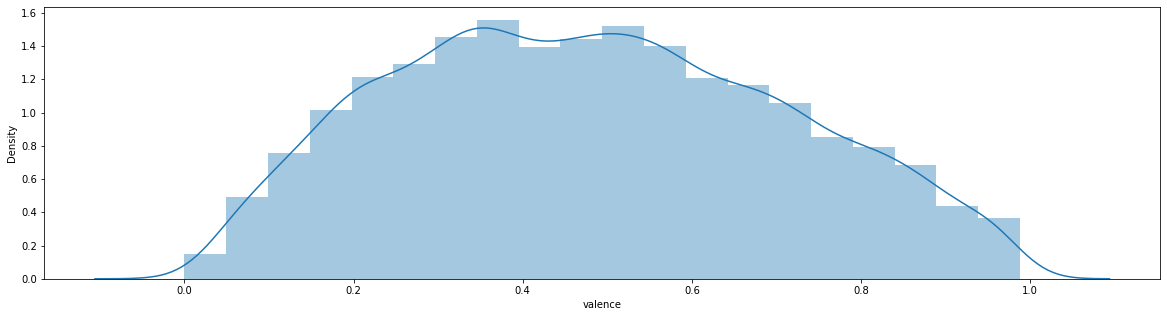

In [ ]:
# analyze distribution of valence
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.distplot(df_en.valence, bins=20, kde=True)
plt.show()

/Users/iriszzwanzig/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'negative'), Text(1, 0, 'positive')]

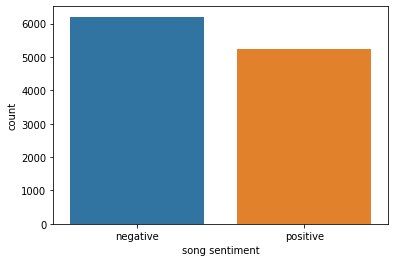

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def to_sentiment(valence):
  if valence < 0.5:
    return 0
  elif valence > 0.5:
    return 1
  else:
    return 2
df_en['sentiment'] = df_en.valence.apply(to_sentiment)

# Plot the score distribution after conversion
ax = sns.countplot(df_en.sentiment)
class_names = ['negative', 'positive']
plt.xlabel('song sentiment')
ax.set_xticklabels(class_names)

In [ ]:
display(df_en[df_en['sentiment']==0].shape)
display(df_en[df_en['sentiment']==1].shape)

(6207, 20)

(5248, 20)

### POS generation

In [ ]:
!pip show spacy
# If you don't have it in your local machine, you can simply download the libraries
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm

Name: spacy
Version: 3.0.6
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: /Users/iriszzwanzig/opt/anaconda3/lib/python3.8/site-packages
Requires: wasabi, jinja2, catalogue, typer, numpy, packaging, spacy-legacy, preshed, requests, thinc, tqdm, srsly, pydantic, setuptools, cymem, murmurhash, pathy, blis
Required-by: en-core-web-sm
Requirement already up-to-date: spacy in /Users/iriszzwanzig/opt/anaconda3/lib/python3.8/site-packages (3.0.6)
Requirement already up-to-date: spacy-lookups-data in /Users/iriszzwanzig/opt/anaconda3/lib/python3.8/site-packages (1.0.0)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Grabs the verb, adverb, noun, and stop word Parts of Speech (POS) tokens  # lower-case # punctuation # stopwords #lemma
import spacy
def add_spacy_data(dataset, feature_column):
    '''
    Grabs the verb, adverb, noun, and stop word Parts of Speech (POS) 
    tokens and pushes them into a new dataset. returns an 
    enriched dataset.
    '''
    
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    nlp = spacy.load('en_core_web_sm')
    ##
    for i in range (0, len(dataset)):
        print("Extracting verbs and topics from record {} of {}".format(i+1, len(dataset)), end = "\r")
        song = dataset.iloc[i][feature_column]
        doc = nlp(song)
        spacy_dataframe = pd.DataFrame()
        for token in doc:
            if token.lemma_ == "-PRON-":
                    lemma = token.text
            else:
                lemma = token.lemma_ # string
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_, # string
                "Stop Word": token.is_stop
            }
            spacy_dataframe = spacy_dataframe.append(row, ignore_index = True)
        verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
        nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
        corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean)
    dataset['Verbs'] = verbs
    dataset['Nouns'] = nouns
    dataset['Adverbs'] = adverbs
    dataset['Corpus'] = corpus
    return dataset

In [ ]:
from datetime import datetime
start_time = datetime.now()
print("Started at {}".format(start_time))
df_en = add_spacy_data(df_en,'lyrics')
end_time = datetime.now()
print("\nCompleted at {}".format(end_time))
print("Total time to collect: {}".format(end_time - start_time))

Started at 2021-05-06 14:31:50.026084
Extracting verbs and topics from record 11455 of 11455
Completed at 2021-05-06 20:13:45.070641
Total time to collect: 5:41:55.044557


In [ ]:
df_en

,acousticness,artist,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,...,song_title,speechiness,tempo,valence,year,sentiment,Verbs,Nouns,Adverbs,Corpus
0,0.130000,James Brown The Famous Flames,0.295,171933.0,0.373,0.0,0.000000,5.0,0.6410,-10.316,...,Lets Make Christmas Mean Something This Year ...,0.0374,172.762,0.378,2007.0,0,let make mean let make mean come get start say...,christma year christma year jame way thank tha...,very very only when there just even sometimes ...,let christma mean year let christma mean year...
1,0.194000,Gerry The Pacemakers,0.548,186053.0,0.892,0.0,0.000000,9.0,0.1600,-7.336,...,Whole Lotta Shakin Going On,0.0654,97.195,0.814,2008.0,1,come goin' say come go faken goin' say come ge...,baby lot shakin baby baby lot shakin verse bab...,solo well easy now ahhhh now real now kinda ju...,come baby lot shakin goin yes say come baby ba...
2,0.000369,Godhead,0.421,285907.0,0.907,0.0,0.084300,0.0,0.2700,-5.836,...,I Sell Society,0.0860,179.440,0.186,2001.0,0,go vulture gon get come bathe be leave get tel...,neon glow plug machine plastic life line probl...,over there so so just very well away just back,vulture gon na come bathe protective neon glo...
3,0.037100,Jimmy Eat World,0.643,165853.0,0.849,0.0,0.000000,2.0,0.0580,-5.428,...,The Middle,0.0526,162.152,0.903,2001.0,1,write be feel leave look try try worry tell be...,head time girl middle ride time girl middle ri...,yet only just when away just just alright well...,hey write head feel leave look try good try w...
4,0.000481,Papa Roach,0.589,199907.0,0.890,1.0,0.000820,4.0,0.2010,-3.719,...,Last Resort,0.0603,90.598,0.692,2001.0,1,cut give cut bleed be cut reach give cut care ...,life piece resort suffocation breathing fuck a...,even never too too where when,cut life piece resort suffocation breathing f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,0.030200,Why Dont We,0.753,167160.0,0.756,0.0,0.000004,10.0,0.0754,-4.662,...,Stay,0.0630,145.948,0.679,2021.0,1,stay be wish be use see wish tell miss lie say...,night season change time thinkin day thing way...,why now here just never now right anymore stil...,stay night oh dear season change time thinkin...
11451,0.325000,ZAYN,0.336,164733.0,0.430,0.0,0.000636,1.0,0.1430,-11.742,...,Unfkwitable,0.0430,169.087,0.497,2021.0,0,be ’ be know ’m show find need inspire get hav...,world shoulder friend love time lie way vibe l...,why so so here up again just why so home now a...,unfuckwithable world shoulder cold unfuckwith...
11452,0.009840,Foo Fighters,0.530,253840.0,0.759,0.0,0.000000,7.0,0.3190,-7.067,...,Waiting On A War,0.0351,131.999,0.502,2021.0,1,wait be be want be want love be wait wait wait...,war boy toy gun number war war day sky crash w...,never really just there just just so just nowh...,wait war young little boy toy gun want number...
11453,0.105000,Ashnikko,0.781,172720.0,0.487,1.0,0.000000,1.0,0.0802,-7.301,...,Little Boy,0.1670,129.941,0.327,2021.0,0,think be think settle be trust keep make do ne...,fuss bitch dust man earth image butt souvenir ...,here unfortunately still unfortunately,oh think worth fuss think bitch settle like d...


In [ ]:
df_en.to_csv("all_songs_preprocessed.csv")

In [ ]:
df_en['lyrics']

0         let's make this christmas mean something this...
1        come over baby whole lot of shakin' goin' on  ...
2        don't go over there, that vultures gonna get y...
3         hey, don't write yourself off yet it's only i...
4         cut my life into pieces, this is my last reso...
                               ...                        
11450     stay one more night oh my dear, why do all th...
11451     i'm unfuckwithable in a world of my own that’...
11452     i've been waiting on a war since i was young ...
11453     oh, you think you're worth all the fuss? you ...
11454     there you are with your college friends you p...
Name: lyrics, Length: 11455, dtype: object